# Glueing a dimension reduction upstream a torch model

We perform dimensionality reduction using Principal Component Analysis (PCA) to project our high-dimensional data into a lower-dimensional space. After reducing the dimensions, we train a PyTorch model on the dimension-reduced vectors.

We then show that we can rebuild a end-to-end torch model from the original original features without any retraining.

We will be using the IRIS dataset as its low dimensionality makes calculation quick. But of course dimension reduction is only making sense for higher dimensions than this. (IRIS n=4).
We have chosen a PCA but any kind of dimensionality reduction technic could apply here as long as you can turn them into a torch model.

In [0]:
displayHTML("""
<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   width="822.638"
   height="686.24713"
   version="1.1"
   id="svg111"
   sodipodi:docname="nn.svg"
   inkscape:version="1.4.2 (ebf0e940, 2025-05-08)"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:svg="http://www.w3.org/2000/svg">
  <sodipodi:namedview
     id="namedview111"
     pagecolor="#ffffff"
     bordercolor="#000000"
     borderopacity="0.25"
     inkscape:showpageshadow="2"
     inkscape:pageopacity="0.0"
     inkscape:pagecheckerboard="0"
     inkscape:deskcolor="#d1d1d1"
     inkscape:zoom="0.90929342"
     inkscape:cx="351.92161"
     inkscape:cy="270.53974"
     inkscape:window-width="1728"
     inkscape:window-height="1387"
     inkscape:window-x="3447"
     inkscape:window-y="25"
     inkscape:window-maximized="0"
     inkscape:current-layer="g114" />
  <g
     transform="matrix(1.2300001,0,0,1.2300001,-753.33746,-464.18003)"
     id="g111">
    <g
       id="g114">
      <rect
         style="fill:#e6e6e6;stroke-width:0.506024"
         id="rect112"
         width="172.56317"
         height="557.92444"
         x="647.35699"
         y="377.38211" />
      <rect
         style="fill:#b3b3b3;stroke-width:0.715627"
         id="rect111"
         width="345.12634"
         height="557.92444"
         x="820.81427"
         y="377.38211" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,591 173,49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path1" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,591 173,82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path2" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,624 173,16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path3" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,624 173,49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path4" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,657 173,-16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path5" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,657 173,16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path6" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,690 173,-49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path7" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,690 173,-16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path8" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,-181.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path9" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,-148.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path10" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,-115.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path11" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,-82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path12" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,-49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path13" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,-16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path14" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path15" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path16" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path17" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,115.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path18" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,148.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path19" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,181.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path20" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,214.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path21" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,247.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path22" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,280.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path23" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,-214.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path24" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,-181.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path25" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,-148.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path26" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,-115.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path27" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,-82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path28" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,-49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path29" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,-16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path30" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path31" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path32" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path33" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,115.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path34" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,148.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path35" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,181.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path36" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,214.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path37" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,247.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path38" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,-247.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path39" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,-214.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path40" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,-181.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path41" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,-148.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path42" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,-115.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path43" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,-82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path44" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,-49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path45" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,-16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path46" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path47" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path48" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path49" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,115.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path50" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,148.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path51" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,181.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path52" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,214.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path53" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,393 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path54" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,426 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path55" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,459 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path56" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,492 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path57" />
      <path
         class="link"
         marker-end=""
         d="m 992.66667,525 173.00003,82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path58" />
      <path
         class="link"
         marker-end=""
         d="m 992.66667,558 173.00003,49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path59" />
      <path
         class="link"
         marker-end=""
         d="m 992.66667,591 173.00003,16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path60" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,624 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path61" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,657 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path62" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,690 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path63" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,723 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path64" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,756 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path65" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,789 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path66" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,822 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path67" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,855 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path68" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,888 1165.6667,607.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path69" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,393 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path70" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,393 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path71" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,426 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path72" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,426 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path73" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,459 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path74" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,459 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path75" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,492 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path76" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,492 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path77" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,525 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path78" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,525 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path79" />
      <path
         class="link"
         marker-end=""
         d="m 992.66667,558 173.00003,82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path80" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,558 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path81" />
      <path
         class="link"
         marker-end=""
         d="m 992.66667,591 173.00003,49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path82" />
      <path
         class="link"
         marker-end=""
         d="m 992.66667,591 173.00003,82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path83" />
      <path
         class="link"
         marker-end=""
         d="m 992.66667,624 173.00003,16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path84" />
      <path
         class="link"
         marker-end=""
         d="m 992.66667,624 173.00003,49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path85" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,657 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path86" />
      <path
         class="link"
         marker-end=""
         d="m 992.66667,657 173.00003,16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path87" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,690 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path88" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,690 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path89" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,723 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path90" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,723 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path91" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,756 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path92" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,756 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path93" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,789 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path94" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,789 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path95" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,822 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path96" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,822 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path97" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,855 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path98" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,855 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path99" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,888 1165.6667,640.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path100" />
      <path
         class="link"
         marker-end=""
         d="M 992.66667,888 1165.6667,673.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path101" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,591 173,16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path102" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,624 173,-16.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path103" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,657 173,-49.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path104" />
      <path
         class="link"
         marker-end=""
         d="m 646.66667,690 173,-82.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path105" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,607.5 173,-214.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path106" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,640.5 173,-247.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path107" />
      <path
         class="link"
         marker-end=""
         d="m 819.66667,673.5 173,-280.5"
         style="fill:none;stroke:#505050;stroke-width:0.5;stroke-opacity:1"
         id="path108" />
      <circle
         r="6.5"
         class="node"
         id="0_0"
         cx="646.66669"
         cy="591"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="0_1"
         cx="646.66669"
         cy="624"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="0_2"
         cx="646.66669"
         cy="657"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="0_3"
         cx="646.66669"
         cy="690"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="1_0"
         cx="819.66669"
         cy="607.5"
         style="fill:#ffffff;stroke:#333333" />
      <text
         class="text"
         x="611.66669"
         y="921"
         style="font-size:12px"
         id="text108"
         dy="0.34999999em">IRIS Input Layer ∈ ℝ⁴</text>
      <text
         class="text"
         x="784.66669"
         y="921"
         style="font-size:12px"
         id="text109">PCA Layer ∈ ℝ³</text>
      <circle
         r="6.5"
         class="node"
         id="1_1"
         cx="819.66669"
         cy="640.5"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="1_2"
         cx="819.66669"
         cy="673.5"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_0"
         cx="992.66669"
         cy="393"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_1"
         cx="992.66669"
         cy="426"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_2"
         cx="992.66669"
         cy="459"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_3"
         cx="992.66669"
         cy="492"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_4"
         cx="992.66669"
         cy="525"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_5"
         cx="992.66669"
         cy="558"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_6"
         cx="992.66669"
         cy="591"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_7"
         cx="992.66669"
         cy="624"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_8"
         cx="992.66669"
         cy="657"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_9"
         cx="992.66669"
         cy="690"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_10"
         cx="992.66669"
         cy="723"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_11"
         cx="992.66669"
         cy="756"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_12"
         cx="992.66669"
         cy="789"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_13"
         cx="992.66669"
         cy="822"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_14"
         cx="992.66669"
         cy="855"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="2_15"
         cx="992.66669"
         cy="888"
         style="fill:#ffffff;stroke:#333333" />
      <text
         class="text"
         dy="0.34999999em"
         x="957.66669"
         y="921"
         style="font-size:12px"
         id="text110">Hidden Layer ∈ ℝ¹⁶</text>
      <circle
         r="6.5"
         class="node"
         id="3_0"
         cx="1165.6666"
         cy="607.5"
         style="fill:#ffffff;stroke:#333333" />
      <text
         class="text"
         dy="0.34999999em"
         x="1130.6666"
         y="921"
         style="font-size:12px"
         id="text111">Output Layer ∈ ℝ³</text>
      <circle
         r="6.5"
         class="node"
         id="3_1"
         cx="1165.6666"
         cy="640.5"
         style="fill:#ffffff;stroke:#333333" />
      <circle
         r="6.5"
         class="node"
         id="3_2"
         cx="1165.6666"
         cy="673.5"
         style="fill:#ffffff;stroke:#333333" />
      <text
         xml:space="preserve"
         style="font-size:23.8482px;text-align:start;writing-mode:lr-tb;direction:ltr;text-anchor:start;fill:#b3b3b3;stroke-width:0.813008"
         x="702.79181"
         y="404.20538"
         id="text112"><tspan
           sodipodi:role="line"
           id="tspan112"
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:23.8482px;font-family:Arial;-inkscape-font-specification:Arial;fill:#1a1a1a;stroke-width:0.813008"
           x="702.79181"
           y="404.20538">PCA</tspan><tspan
           sodipodi:role="line"
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:23.8482px;font-family:Arial;-inkscape-font-specification:Arial;fill:#1a1a1a;stroke-width:0.813008"
           x="702.79181"
           y="434.29169"
           id="tspan115">Layer</tspan></text>
      <text
         xml:space="preserve"
         style="font-size:23.8482px;text-align:start;writing-mode:lr-tb;direction:ltr;text-anchor:start;fill:#b3b3b3;stroke-width:0.813008"
         x="834.54187"
         y="402.41718"
         id="text113"><tspan
           sodipodi:role="line"
           id="tspan113"
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:23.8482px;font-family:Arial;-inkscape-font-specification:Arial;fill:#1a1a1a;stroke-width:0.813008"
           x="834.54187"
           y="402.41718">Torch</tspan><tspan
           sodipodi:role="line"
           style="font-style:normal;font-variant:normal;font-weight:normal;font-stretch:normal;font-size:23.8482px;font-family:Arial;-inkscape-font-specification:Arial;fill:#1a1a1a;stroke-width:0.813008"
           x="834.54187"
           y="432.50348"
           id="tspan114">Classifier</tspan></text>
    </g>
  </g>
  <defs
     id="defs111">
    <marker
       id="arrow"
       viewBox="0 -5 10 10"
       markerWidth="7"
       markerHeight="7"
       orient="auto"
       refX="30.200001">
      <path
         d="M 0,-5 10,0 0,5"
         style="fill:none;stroke:#505050"
         id="path111" />
    </marker>
  </defs>
</svg>

""")

<?xml version="1.0" encoding="UTF-8" standalone="no"?>
 
 <sodipodi:namedview
 id="namedview111"
 pagecolor="#ffffff"
 bordercolor="#000000"
 borderopacity="0.25"
 inkscape:showpageshadow="2"
 inkscape:pageopacity="0.0"
 inkscape:pagecheckerboard="0"
 inkscape:deskcolor="#d1d1d1"
 inkscape:zoom="0.90929342"
 inkscape:cx="351.92161"
 inkscape:cy="270.53974"
 inkscape:window-width="1728"
 inkscape:window-height="1387"
 inkscape:window-x="3447"
 inkscape:window-y="25"
 inkscape:window-maximized="0"
 inkscape:current-layer="g114" />
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 IRIS Input Layer ∈ ℝ⁴ 
 PCA Layer ∈ ℝ³ 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 Hidden Layer ∈ ℝ¹⁶ 
 
 Output Layer ∈ ℝ³ 
 
 
 PCA Layer 
 Torch Classifier

In [0]:
%pip install torch shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 159.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 94.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 142.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 161.3 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2019.3
    Uninstalling pytz-2019.3:
      Successfully uninstalled pytz-2019.3
  Attempting uninstall: nvidia-nccl-cu12
    Found existing installation: nvidia-nccl-cu12 2.28.3
    Uninstalling nvidia-nccl-cu12-2.28.3:
      Successfully uninstalled nvidia-nccl-cu12-2.28.3
Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [0]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [0]:
import torch
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)
print('Features sample:', X_tensor[:5])
print('Target sample:', y_tensor[:5])
X_np = X_tensor.numpy()

Features sample: tensor([[5.1000, 3.5000, 1.4000, 0.2000],
        [4.9000, 3.0000, 1.4000, 0.2000],
        [4.7000, 3.2000, 1.3000, 0.2000],
        [4.6000, 3.1000, 1.5000, 0.2000],
        [5.0000, 3.6000, 1.4000, 0.2000]])
Target sample: tensor([0, 0, 0, 0, 0])


# Fit the PCA

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_np) # TODO : Fit on the train so not to have target spill.
explained_variance = pca.explained_variance_ratio_
import torch
X_pca_tensor = torch.tensor(X_pca, dtype=torch.float32)

In [0]:
print('Explained variance ratio:', explained_variance)
print('PCA transformed sample:', X_pca[:5])

Explained variance ratio: [0.9246221  0.05306487 0.01710105]
PCA transformed sample: [[-2.684127    0.3193903  -0.02791756]
 [-2.7141428  -0.17701483 -0.21044749]
 [-2.888991   -0.14495516  0.01791251]
 [-2.745343   -0.31830263  0.03157157]
 [-2.7287178   0.3267522   0.09007287]]


# Train a pytorch model on top of the PCA

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class SimpleClassifier(nn.Module):
    """
    SimpleClassifier is a toy neural network model for classifying iris flowers.
    Args:
        None
    """
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(X_pca_tensor.shape[1], 16)
        self.fc2 = nn.Linear(16, 3)  # 3 classes in IRIS
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = SimpleClassifier()

In [0]:
import torch.optim as optim
from sklearn.model_selection import train_test_split

# Split data for quick validation
X_train, X_test, y_train, y_test = train_test_split(X_pca_tensor, y_tensor, test_size=0.2, random_state=42)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

n_epochs = 100
for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 20 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {loss.item():.4f}")

# Evaluate
model.eval()
with torch.no_grad():
    test_outputs = model(X_test)
    _, predicted = torch.max(test_outputs, 1)
    accuracy = (predicted == y_test).float().mean().item()
    print(f"Test Accuracy: {accuracy:.2%}")

Epoch 20/100, Loss: 0.5545
Epoch 40/100, Loss: 0.2437
Epoch 60/100, Loss: 0.1363
Epoch 80/100, Loss: 0.0944
Epoch 100/100, Loss: 0.0767
Test Accuracy: 100.00%


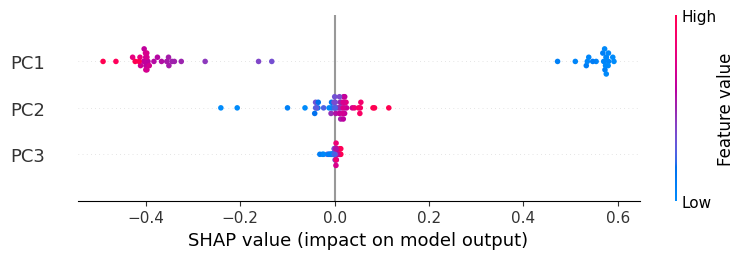

In [0]:
import shap
import torch.nn.functional as F

# Use X_train from PCA split (ensure it's available)
# If X_train is not in scope, re-split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca_tensor, y_tensor, test_size=0.2, random_state=42)

# Predict function for SimpleClassifier
model.eval()
def simple_predict(x_numpy):
    x_tensor = torch.tensor(x_numpy, dtype=torch.float32)
    with torch.no_grad():
        logits = model(x_tensor)
        probs = F.softmax(logits, dim=1)
        return probs.numpy()

# Use a sample for efficiency
X_sample = X_train[:50].numpy()

explainer = shap.Explainer(simple_predict, X_sample)
shap_values = explainer(X_sample, max_evals=100)

# Show summary plot for class 0
shap.summary_plot(shap_values.values[:,:,0], X_sample, feature_names=[f'PC{i+1}' for i in range(X_sample.shape[1])])

# Build a single torch model that comprises the PCA (as a torch layer) and the original classifier

In [0]:
import torch
import torch.nn as nn

# Extract PCA parameters from sklearn PCA
pca_components = torch.tensor(pca.components_, dtype=torch.float32)
pca_mean = torch.tensor(pca.mean_, dtype=torch.float32)

class TorchPCA(nn.Module):
    """
    TorchPCA applies a linear PCA transformation using parameters from a fitted sklearn PCA.
    Args:
        components (torch.Tensor): PCA components (eigenvectors), shape [n_components, n_features].
        mean (torch.Tensor): Mean vector used for centering, shape [n_features].
    Forward:
        x (torch.Tensor): Input features, shape [batch_size, n_features].
        Returns: Transformed features in PCA space, shape [batch_size, n_components].    
    """
    def __init__(self, components, mean):
        super().__init__()
        self.register_buffer('components', components)
        self.register_buffer('mean', mean)
    def forward(self, x):
        x_centered = x - self.mean
        return torch.matmul(x_centered, self.components.t())

# Glue TorchPCA and SimpleClassifier
class PCAGluedClassifier(nn.Module):
    """
    PCAGluedClassifier applies PCA transformation followed by classification using a neural network. The resulting model is torch module that could be retrained if need be.
    Args:
        pca_module (TorchPCA): Module for PCA transformation.
        classifier (SimpleClassifier): Neural network classifier.
    Forward:
        x (torch.Tensor): Input features, shape [batch_size, n_features].
        Returns: Class probabilities, shape [batch_size, n_classes].
    """
    def __init__(self, pca_module, classifier):
        super().__init__()
        self.pca = pca_module
        self.classifier = classifier
    def forward(self, x):
        x_pca = self.pca(x)
        return self.classifier(x_pca)

# Instantiate the glued model
pca_torch = TorchPCA(pca_components, pca_mean)
glued_model = PCAGluedClassifier(pca_torch, model)

# Example usage: glued_model(X_tensor)

In [0]:
from sklearn.model_selection import train_test_split

def evaluate_glued_model(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs, 1)
        accuracy = (predicted == y_test).float().mean().item()
        print(f"Glued Model Test Accuracy: {accuracy:.2%}")

evaluate_glued_model(glued_model, X_tensor, y_tensor)

Glued Model Test Accuracy: 100.00%


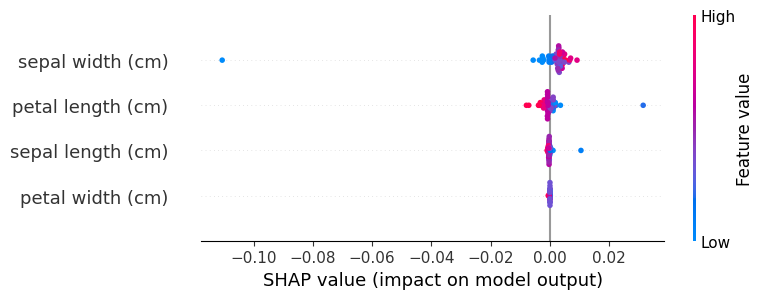

In [0]:
import shap
import torch.nn.functional as F

# Use a small sample for SHAP to keep it efficient
X_sample = X_tensor[:50]

# Predict function returns class probabilities
def model_predict(x_numpy):
    x_tensor = torch.tensor(x_numpy, dtype=torch.float32)
    with torch.no_grad():
        logits = glued_model(x_tensor)
        probs = F.softmax(logits, dim=1)
        return probs.numpy()

# Use the unified SHAP Explainer API
explainer = shap.Explainer(model_predict, X_sample.numpy())
shap_values = explainer(X_sample.numpy(), max_evals=100)

# Show summary plot for class 0
shap.summary_plot(shap_values.values[:,:,0], X_sample.numpy(), feature_names=iris.feature_names)

# Conclusion
We have shown how to glue a PCA to a torch classifier so SHAP is able to come back to the original features.